In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

# import custom modules
from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import dump

## Loading del dataset e Preprocessing

In [ ]:
df = db.get_dataset("tripadvisor_hotel_reviews")
df.head(2)

In [ ]:
x_column_name = "Review"
x_column_cleaned_name = x_column_name + "_clean"

In [ ]:
proprocessing_function = preprocessing.preprocess_text
preprocessing.preprocess_dataframe(df, x_column_name, proprocessing_function)
df.head(2)

In [ ]:
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEGATIVE if x == "negative" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.POSITIVE if x == "positive" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEUTRAL if x == "neutral" else x)

df.sample(5)

## Cose delle Classificazioni

In [ ]:
classification.append_sentiment_for_each_row(df, x_column_cleaned_name, new_column_name='sentiment')
df.head(3)

In [ ]:
X, y = df[x_column_cleaned_name], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
vectorizers = list()

vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer())
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

models = [PassiveAggressiveClassifier, LogisticRegression, MultinomialNB, SVC]

classification.test_classifiers(models, vectorizers, x_train, x_test, y_train, y_test)

KeyboardInterrupt: 

Accuracy: 0.9619419370578189
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.35      0.50       200
     Neutral       0.00      0.00      0.00        21
    Positive       0.96      1.00      0.98      3878

    accuracy                           0.96      4099
   macro avg       0.61      0.45      0.49      4099
weighted avg       0.95      0.96      0.95      4099

Confusion matrix, without normalization


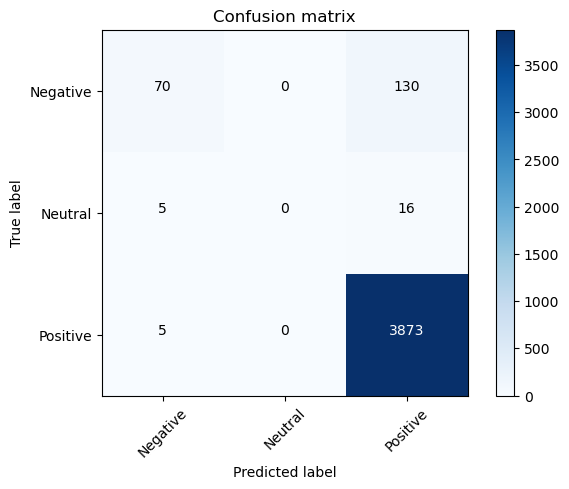

In [9]:
# Best combination of model and vectorizer
vectorizer = TfidfVectorizer()
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

class_names = classification.Sentiment.get_all()
model = classification.test_classifier(LogisticRegression, x_train_trasformed, x_test_trasformed, y_train, y_test, class_names)

In [10]:
dump.save_model(model, "model_trip")
dump.save_vectorizer(vectorizer, "vectorizer_trip")

Saving model at: dump_models/model_trip.pkl
Saving vectorizer at: dump_models/vectorizer_trip.pkl
